In [1]:
# importing liberaries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
from scipy.stats import norm

In [2]:
# Reading and displaying data
df = pd.read_csv("matches.csv")
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
# checking null values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

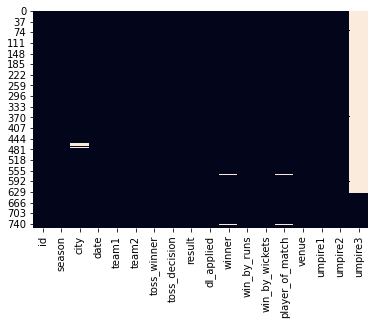

In [5]:
# visually checking null values
sns.heatmap(df.isnull(),cbar=False)

In [6]:
# describing the data
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
# Seasons in the Data
df.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [8]:
# Total no. of matches
df.id.count()

756

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


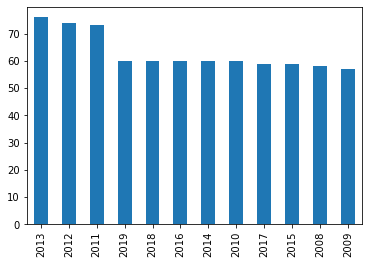

In [9]:
# Season with most no. of Matches!!!
a = df.season.value_counts()
print(a)
a.plot.bar()


# From the above data its obvious that Season 2013 has Most no. of matches than any other season ie. 76.

# And

# Season 2009 has the lowest no. of matches ie. 57.

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


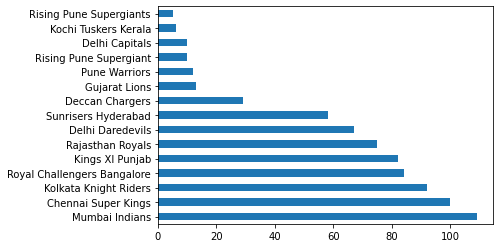

In [10]:
# Team who on most no. of matches!!1
a = df.winner.value_counts()
print(a)
a.plot.barh()

# From the above data its obvious that Mumbai Indians has Won Most matches ie. 109

# And

# Rising pune Supergiants have won the lowest no. of matches ie. 5.

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
K Rabada           1
Mohammed Shami     1
SM Katich          1
AD Mascarenhas     1
SA Asnodkar        1
Name: player_of_match, Length: 226, dtype: int64


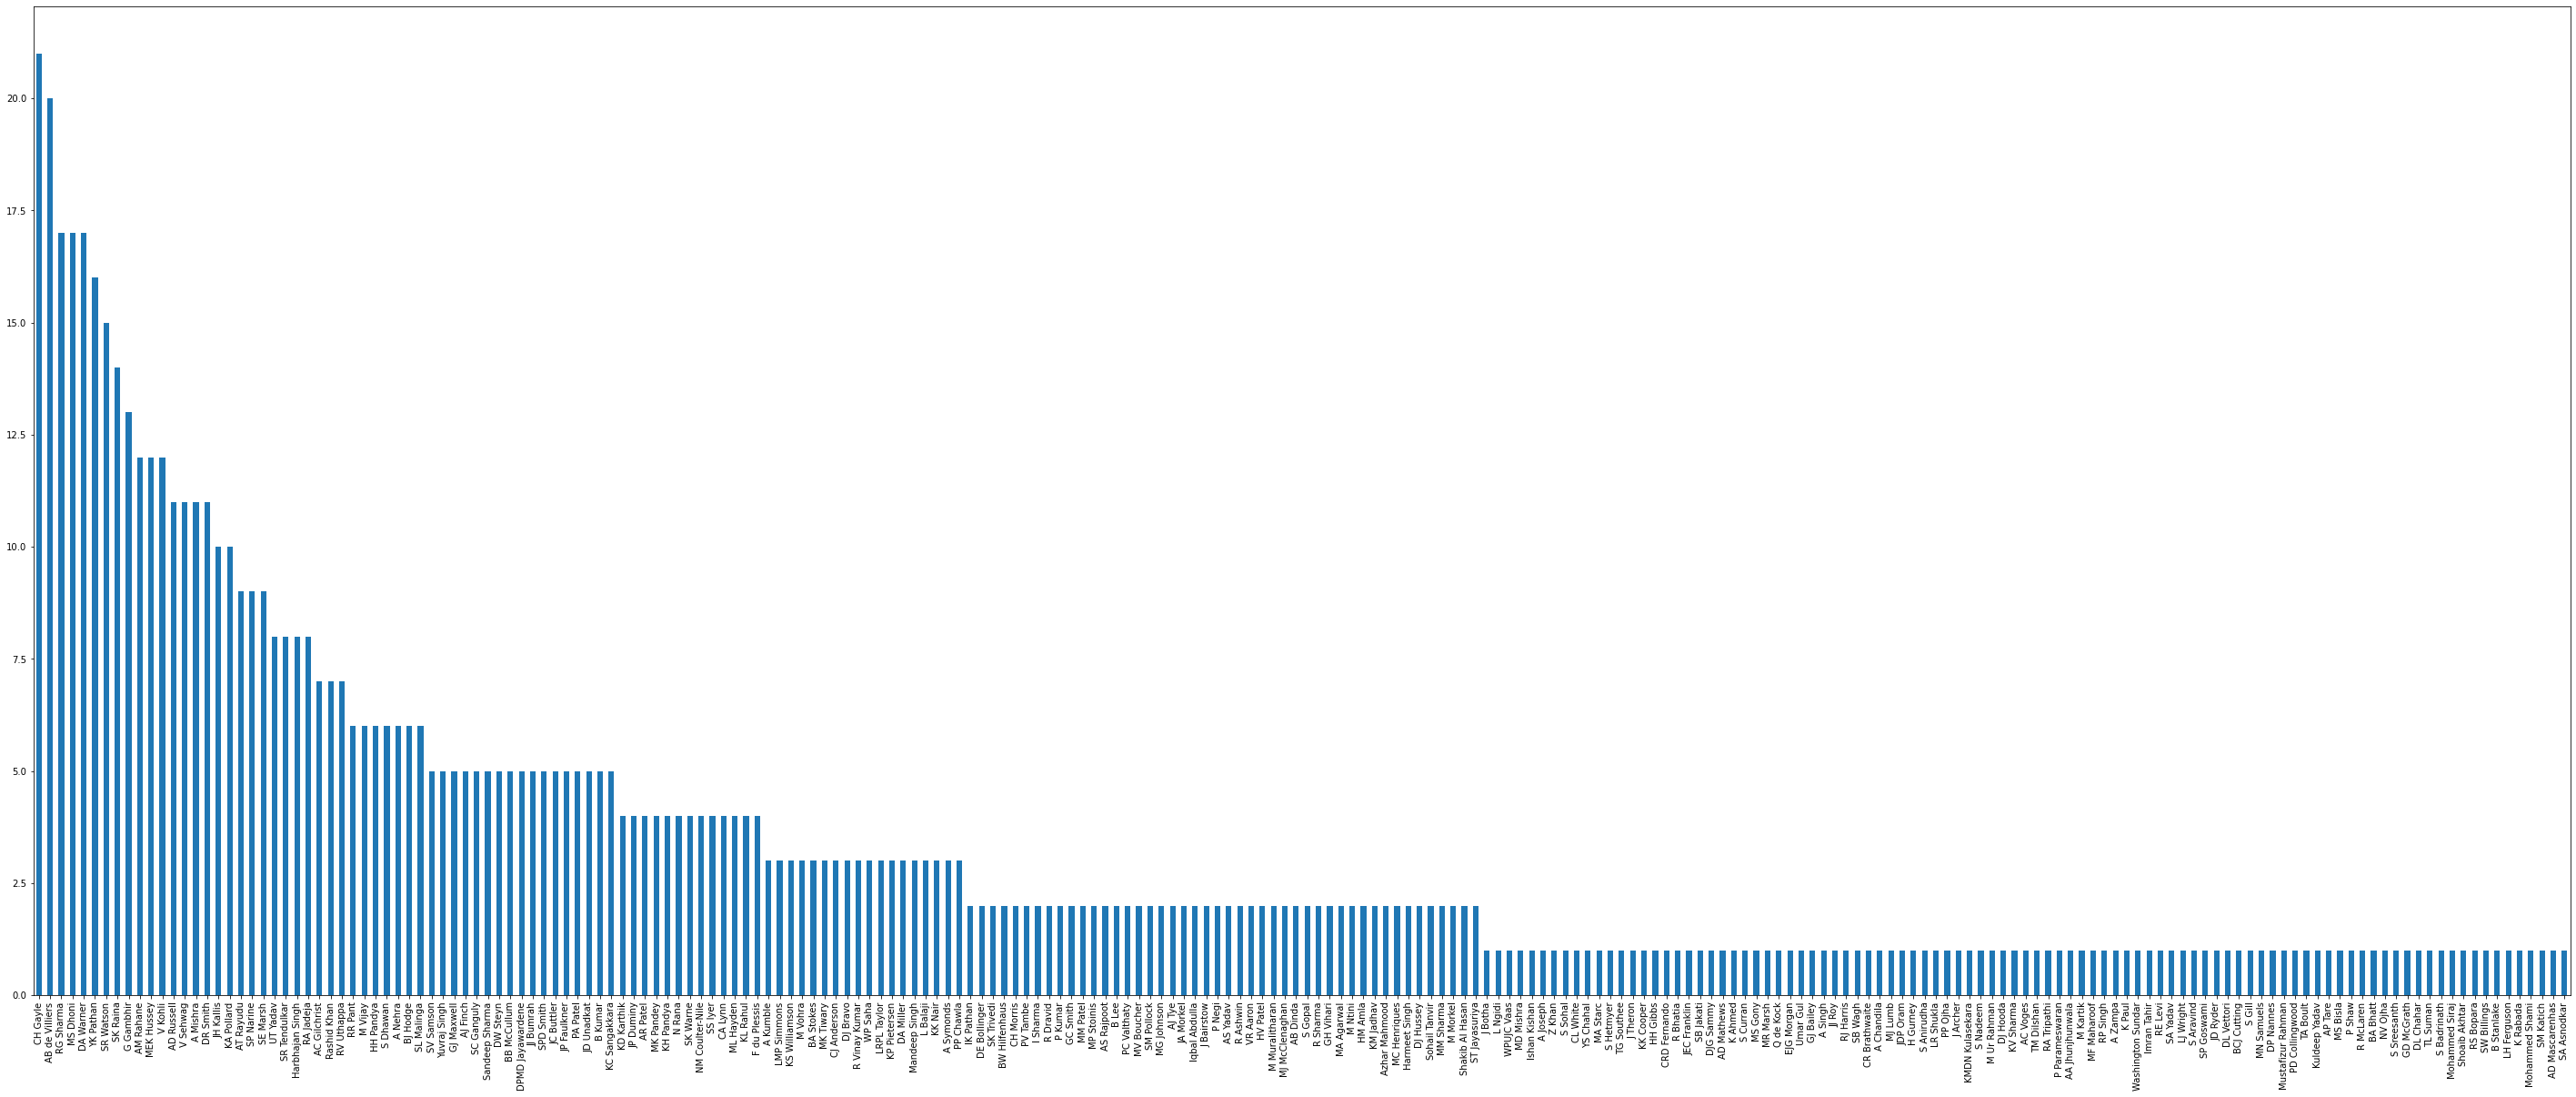

In [11]:
# Most of the Time Player Of the Match!!!
a = df.player_of_match.value_counts()
print(a)
a.plot.bar(figsize=(50,20))

# CH Gayle is the "Player of The Match" in most of the Matches!!!!

In [12]:
# Team Won by Maximum Runs out OF 12 Seasons
a = df.iloc[df['win_by_runs'].idxmax()]
print(a)


print("\nTeam Won by Maximum Runs from the 12 Seasons is:-  ",a['winner'])

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

Team Won by Maximum Runs from the 12 Seasons is:-   Mumbai Indians


In [13]:
# Team Won by Minimum Runs out OF 12 Seasons
a = df.iloc[df['win_by_runs'].idxmin()]
print(a)

print("\nTeam Won by Minimum Runs From the 12 Seasons is:-  ",a['winner'])

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [14]:
# Team won by Maximum Wickets out of 12 Seasons
a = df.iloc[df['win_by_wickets'].idxmax()]
print(a)
print("\n Team won by Maximimun Wickets From the 12 Seasons is:- ",a['winner'])

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [15]:
# Team won by Minimum Wickets out of 12 Seasons
a = df.iloc[df['win_by_wickets'].idxmin()]
print(a)
print("\n Team won by Minimum Wickets From the 12 Seasons is:- ",a['winner'])

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

True     393
False    363
dtype: int64


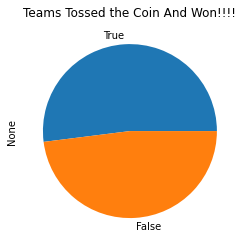

In [16]:
# Teams Tossed the coin and Won(Luck is on their Side!)
a = df.toss_winner == df.winner
a = a.value_counts()
print(a)
a.plot.pie()
plt.title('Teams Tossed the Coin And Won!!!!')
plt.show()

# Q1.Take the win_by_wickets dataset and plot frequency distribution graph

#On x-axis - Win by Wickets on y-axis Win by Wickets margin

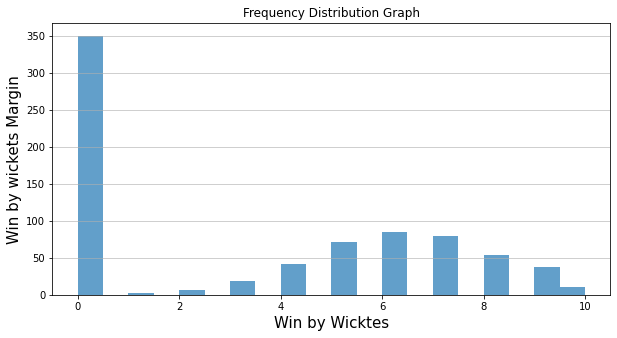

In [17]:
 plt.figure(figsize=[10,5])
 n, bins, patches = plt.hist(x=df.win_by_wickets, bins=20,alpha=0.7)
 plt.grid(axis='y', alpha=0.75)
 plt.xlabel('Win by Wicktes',fontsize=15)
 plt.ylabel('Win by wickets Margin',fontsize=15)
 plt.xticks(fontsize=10)
 plt.yticks(fontsize=10)
 plt.title('Frequency Distribution Graph')
 plt.show()

# Q2. Relative frequency distribution graph using the same data set win_by_wickets

#Hint: use normalize = True argument for pandas.Series.value_counts

#Instead of showing frequency show percentage of values



In [18]:
r_winbywick = df['win_by_wickets'].value_counts(sort = False,normalize=True)
r_winbywick

0     0.462963
1     0.003968
2     0.007937
3     0.023810
4     0.054233
5     0.093915
6     0.112434
7     0.105820
8     0.071429
9     0.048942
10    0.014550
Name: win_by_wickets, dtype: float64

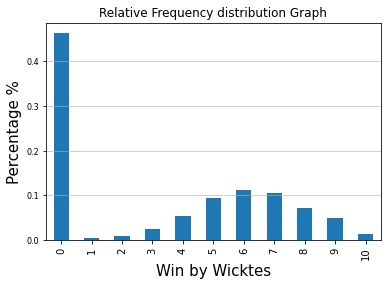

In [19]:
r_winbywick.plot.bar()
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Win by Wicktes',fontsize=15)
plt.ylabel('Percentage %',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.title('Relative Frequency distribution Graph')
plt.show()

# Q3. Plot Cumulative relative frequency graph

#Use function pandas.Series.cumsum

0     0.462963
1     0.466931
2     0.474868
3     0.498677
4     0.552910
5     0.646825
6     0.759259
7     0.865079
8     0.936508
9     0.985450
10    1.000000
Name: win_by_wickets, dtype: float64


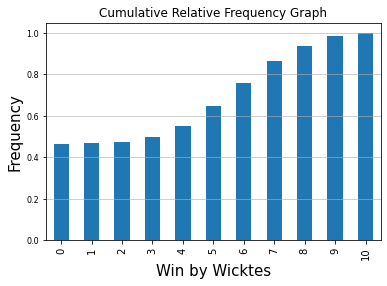

In [20]:
# cumulative Frequency Graph for Win by Wickets
crf_winbywick = df['win_by_wickets'].value_counts(sort=False,normalize=True).cumsum()
print(crf_winbywick)

crf_winbywick.plot.bar()
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Win by Wicktes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.title('Cumulative Relative Frequency Graph')
plt.show()

0      0.554233
1      0.567460
2      0.576720
3      0.583333
4      0.597884
         ...   
130    0.994709
138    0.996032
140    0.997354
144    0.998677
146    1.000000
Name: win_by_runs, Length: 89, dtype: float64


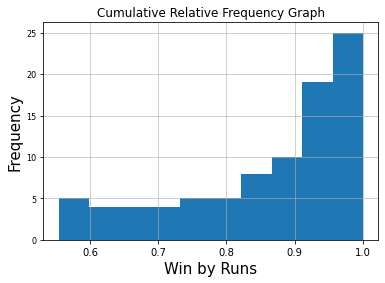

In [21]:
# cumulative Frequency Graph for Win by Runs

crf_winbyrun = df['win_by_runs'].value_counts(sort=False,normalize=True).cumsum()
print(crf_winbyrun)

crf_winbyrun.plot.hist()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.xlabel('Win by Runs',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.title('Cumulative Relative Frequency Graph')
plt.show()

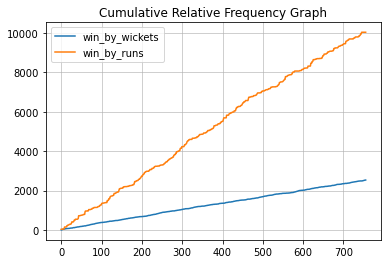

In [22]:
# cumulative Relative Frequency Graph for Win by Wickets and Win by Runs

a = pd.DataFrame(df,columns=['win_by_wickets','win_by_runs'])
a = a.cumsum()
a.plot.line()
plt.grid(axis='x', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.title('Cumulative Relative Frequency Graph')
plt.show()

# Q4. Find out the probability of winning a match by 6 wickets or less?

#Find out the probability using the cumulative relative frequency graph

#Draw a vertical line from 6 on x-axis till it intercepts the curve and the draw the horizontal line till it intercepts y-axis

#Hint: Answer is 54%

0     0.462963
1     0.466931
2     0.474868
3     0.498677
4     0.552910
5     0.646825
6     0.759259
7     0.865079
8     0.936508
9     0.985450
10    1.000000
Name: win_by_wickets, dtype: float64


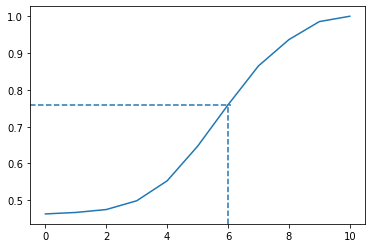

In [23]:
# data with 0 values present!!!
winbywick = df['win_by_wickets'].value_counts(sort = False, normalize = True).cumsum()
print(winbywick)

plt = winbywick.plot.line()
plt.axhline(y = winbywick[6], xmax = 0.6, linestyle='--')
plt.axvline(x = 6, ymax = winbywick[4], linestyle='--')

# From the Above results we can say that The Probability of winning a match by 6 wickets or less wickets is Approximately :- 0.76 = 76%

1     0.007389
2     0.022167
3     0.066502
4     0.167488
5     0.342365
6     0.551724
7     0.748768
8     0.881773
9     0.972906
10    1.000000
Name: win_by_wickets, dtype: float64


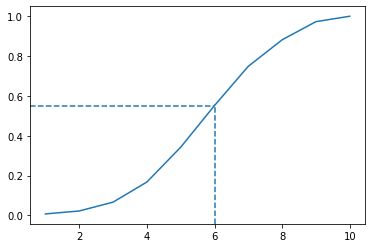

In [24]:
# When we wont take the 0's present in the column then the probability is comming out correct = 54%

winbywick = df[df.win_by_wickets > 0].win_by_wickets # Wickets data Without 0 values in the columns!!!!
winbywick = winbywick.value_counts(sort = False, normalize = True).cumsum()
print(winbywick)

plt = winbywick.plot.line()
plt.axhline(y = winbywick[6], xmax = 0.55, linestyle='--')
plt.axvline(x = 6, ymax = winbywick[6], linestyle='--')

# From the Above results we can say that The Probability of winning a match by 6 wickets or less wickets is Approximately :- 0.54 = 54%

# But only when if we dont count the win by 0 wickets!!!!

# Q5. Plot the normal distribution for win_by_wickets data.

#Calculate mean and standard deviation for win_by_wickets data

#Plot Histogram

#Plot Line Graph

#Plot Normal distribution between 1 and 10 using mean and standard deviation as calculated above



# Calculate mean and standard deviation for win_by_wickets data

In [25]:
# Mean and Standard Deviation when data contains 0 values!!
winwick_mean = df['win_by_wickets'].mean()
print("Calculated Mean for win_by_wickets is :- ",winwick_mean)

winwick_std = df['win_by_wickets'].std()
print("Calculated Standard Deviation for win_by_wickets is :- ",winwick_std)

Calculated Mean for win_by_wickets is :-  3.3505291005291005
Calculated Standard Deviation for win_by_wickets is :-  3.3879626784264074


In [26]:
# mean and std for data without 0 values !!1
wbw = df[df.win_by_wickets > 0].win_by_wickets

winwick0_mean = wbw.mean()
print("Calculated Mean for win_by_wickets without any 0 values is :- ",winwick0_mean)

winwick0_std = wbw.std()
print("Calculated Standard Deviation for win_by_wickets without any 0 values is :- ",winwick0_std)

Calculated Mean for win_by_wickets without any 0 values is :-  6.238916256157635
Calculated Standard Deviation for win_by_wickets without any 0 values is :-  1.8256236026762627


# Histograms

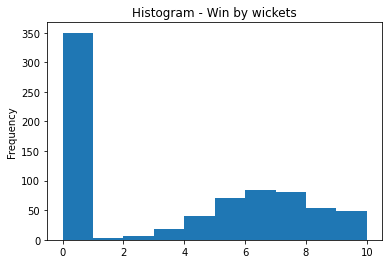

In [27]:
# Plot histogram graph - 1
df['win_by_wickets'].plot.hist(title="Histogram - Win by wickets")

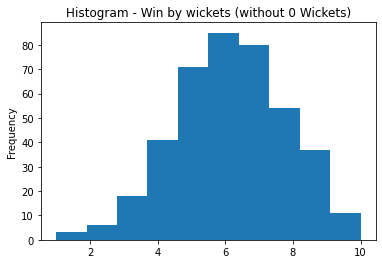

In [28]:
# Plot histogram graph - 2  (without 0 wickets)
wbw.plot.hist(title="Histogram - Win by wickets (without 0 Wickets)")

 # Line Graphs

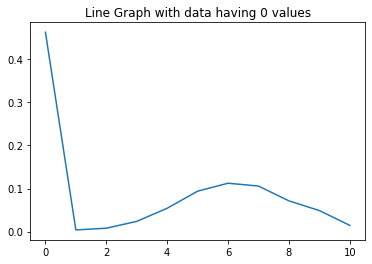

In [33]:
# plot line graph - with 0 walues in data
df['win_by_wickets'].value_counts(sort=False,normalize=True).plot.line(title="Line Graph with data having 0 values")

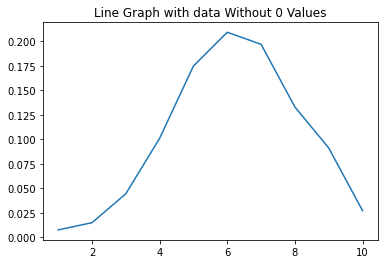

In [34]:
# plot line graph without 0 values in the Data
wbw.value_counts(sort = False , normalize = True).plot(title="Line Graph with data Without 0 Values")

# Plot Normal distribution between 1 and 10 using mean and standard deviation as calculated above

In [37]:
# for data with 0 value in it !!!
a = np.arange(1, 10, 0.001)
plt.plot(a, norm.pdf(a, winwick_mean, winwick_std))

In [36]:
# For data without 0 values in it !!!
b = np.arange(1, 10, 0.001)
plt.plot(b, norm.pdf(b, winwick0_mean, winwick0_std))

# 6. Calculate z-score if the team wins by 35 runs.

#Calculate mean and standard deviation for win_by_wickets data

#Use win_by_runs dataset

In [38]:
# z score with 0 runs included
winrun0_mean = df['win_by_runs'].mean() # mean for win_by_runs
print("Calculated Mean for win_by_runs is :- ",winrun0_mean)

winrun0_std = df['win_by_runs'].std() # std for win_by)_runs
print("Calculated Standard Deviation for win_by_runs is :- ",winrun0_std)

# Z score
zscore0_35 = (35 - winrun0_mean) / winrun0_std
print("Z Score if the team win by 35 runs is :- ",zscore0_35)

Calculated Mean for win_by_runs is :-  13.283068783068783
Calculated Standard Deviation for win_by_runs is :-  23.471143993666452
Z Score if the team win by 35 runs is :-  0.9252608744930114


In [39]:
# z score without 0 runs
winrun = df[df.win_by_runs > 0].win_by_runs

winrun_mean = winrun.mean() # mean for win_by_runs
print("Calculated Mean for win_by_runs is :- ",winrun_mean)

winrun_std = winrun.std() # std for win_by)_runs
print("Calculated Standard Deviation for win_by_runs is :- ",winrun_std)

# Z score
zscore_35 = (35 - winrun_mean) / winrun_std
print("Z Score if the team win by 35 runs is :- ",zscore_35)

Calculated Mean for win_by_runs is :-  29.798219584569733
Calculated Standard Deviation for win_by_runs is :-  27.281615502747165
Z Score if the team win by 35 runs is :-  0.1906698089380545


# 7. Calculate percentile using z-score.

#Use scipy.stats.norm.cdf function

In [40]:
# Percentile when data has 0 value in it!!!
z0 = norm.cdf(zscore0_35)
print(" Percentile using Z Score when data have 0 value in it :- ",z0," = ",z0*100,"%")

 Percentile using Z Score when data have 0 value in it :-  0.8225848873441655  =  82.25848873441655 %


In [41]:
# Percentile when data don't have 0 value in it!!!
z = norm.cdf(zscore_35)
print(" Percentile using Z Score when data don't have 0 value in it :- ",z," = ",z*100,"%")

 Percentile using Z Score when data don't have 0 value in it :-  0.5756078531581299  =  57.56078531581299 %
